In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

caption_file = './combined_captions_CS_241.csv'

In [31]:
df_caption = pd.read_csv(caption_file, header=None, sep='\t')
df_caption.columns = ['tid', 'course_date', 'seg_idx', 'start_time', 'end_time', 'caption', 'caption_lemmatized']
df_caption['start_time'] = pd.to_timedelta(df_caption['start_time']).apply(lambda x: x.total_seconds() / 60) 
df_caption['end_time'] = pd.to_timedelta(df_caption['end_time']).apply(lambda x: x.total_seconds() / 60) 


df_caption.head(3)

,tid,course_date,seg_idx,start_time,end_time,caption,caption_lemmatized
0,007a4c69-a949-4550-b450-ecb4cd7a8b1e,2019-08-29 18:51:20.728746,15,0.010667,0.979000,OK right so we want to make a barrier out of t...,ok right so we want to make a barrier out of t...
1,007a4c69-a949-4550-b450-ecb4cd7a8b1e,2019-08-29 18:51:20.728749,23,0.987000,1.579000,right so was left well we've got this if we ma...,right so be leave well we 've get this if we m...
2,007a4c69-a949-4550-b450-ecb4cd7a8b1e,2019-08-29 18:51:20.728752,33,1.589333,2.249667,but the fifth thread will do what OK so here's...,but the fifth thread will do what ok so here b...


In [32]:
df_caption.groupby('tid')['tid'].count().sort_values(ascending=False)

tid
4e573abf-cf71-448e-9c87-e47ce02c5bf0    92
7466bd20-538e-4aeb-b004-1fa8fb518f9f    85
bc05bdb0-371d-4cd3-97a6-753a576a32f2    75
f7acd66f-6e2d-4d16-ad5b-83adf8627df9    73
3f559120-de38-4bc0-bcf2-95f88505b2a5    67
                                        ..
6294f981-6e83-4197-a055-9b34816b1257     2
83c8c367-376a-4574-bc73-6b7b742d1b47     2
0e632880-1c9f-491d-b02d-a61aa58f2639     1
631bb988-4152-4a20-a77e-bcd5ee36e8bd     1
3ce291dc-9221-4a5f-aac9-4747049cb814     1
Name: tid, Length: 389, dtype: int64

In [40]:
# visualize the gap between captions
def visualize_gap(df, ax=None):
    max_gap = 0
    last_end = 0
    for idx, row in df.iterrows():
        # print(row)
        start_time = row['start_time']

        max_gap = max(max_gap, start_time - last_end)

        end_time = row['end_time']
        last_end = end_time

        ax.fill_between([start_time, end_time], 0, 1, color='green', alpha=0.5)
    return ax, max_gap

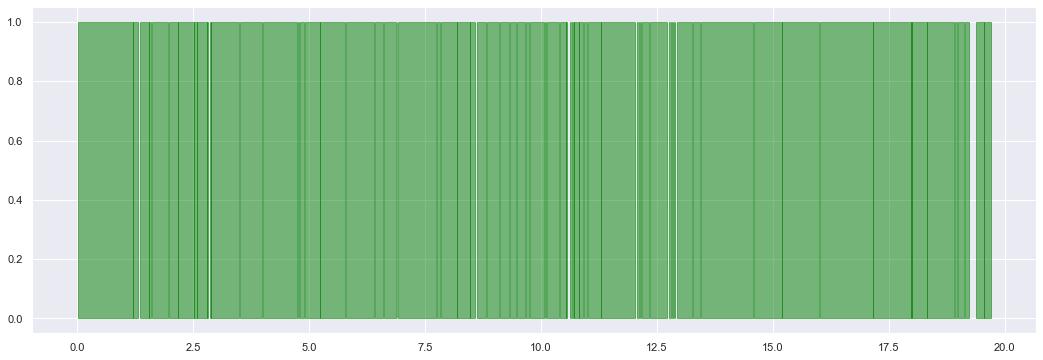

In [47]:
fig, ax = plt.subplots(figsize=(18,6))

ax, max_gap = visualize_gap(df_caption[df_caption['tid']=='3f559120-de38-4bc0-bcf2-95f88505b2a5'], ax=ax)

In [48]:
max_gap

0.15183333333333593